<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> Web Scraping ETL 📊

</p>
</div>

# Dataset Category : REAL ESTATE

# Primary Objectives :

- Extract Data Online
- Transform the data
- load to a csv File
- load CSv File to MYSqL Database



#  Scrape Data for single Page 📃

In [13]:
# Import required data libraries
import requests
from bs4 import BeautifulSoup as bs
URL ="https://nigeriapropertycentre.com/for-sale/houses/showtype"
req = requests.get(URL)
# create empty lists
Home_types =[]
Home_summary=[]
Real_estate_company=[]
sales_prices=[]
# load the parser
soup = bs(req.text, 'html.parser')
# Input the code content you wish to scrape
Home_type = soup.find_all("h4", attrs={"class","content-title"})

for i in Home_type:
    H=i.text
    Home_types.append(H)
print(Home_types)

print("-" * 125)

Home_summaries= soup.find_all("p")
for i in Home_summaries:
    H_S=i.text
    Home_summary.append(H_S)
print(Home_summary)


print("-" * 125)


Real_estate_companies= soup.find_all("span", attrs={"class","marketed-by pull-right hidden-xs hidden-sm text-right"})#class="date-label"
for i in Real_estate_companies:
    RSE=i.text
    Real_estate_company.append(RSE)
print(Real_estate_company)

print("-" * 125)

sales_price= soup.find_all("span", attrs={"class","pull-sm-left"})#class="date-label"
for i in sales_price:
    S_P=i.text
    sales_prices.append(S_P)
print(sales_prices)


['4 bedroom house for sale', '4 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale', '4 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale', '4 bedroom terraced duplex for sale', '4 bedroom detached duplex for sale', '5 bedroom terraced duplex for sale', '4 bedroom detached duplex for sale', '4 bedroom terraced duplex for sale', '4 bedroom detached duplex for sale', '4 bedroom detached duplex for sale', '4 bedroom detached duplex for sale', '5 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale', '5 bedroom detached duplex for sale', '2 bedroom block of flats for sale', '4 bedroom semi-detached duplex for sale', '4 bedroom semi-detached duplex for sale', '5 bedroom terraced duplex for sale', '4 bedroom block of flats for sale']
-----------------------------------------------------------------------------------------------------------------------------
['\nDirect brief\nfor sale\n4 bedroom semi-detached house with

# Scrape data for multiple pages 📚

In [35]:
# Import for Required libraries
import requests
from bs4 import BeautifulSoup as bs
Home_types =[]
Home_summary=[]
Real_estate_company=[]
sales_prices=[]
# scrape the data for 10 pages
for i in range (1,10):
    URL ="https://nigeriapropertycentre.com/for-sale/houses/showtype"
    soup = bs(req.text, 'html.parser')
    Home_type = soup.find_all("h4", attrs={"class","content-title"})#attrs={'class','head'
    for i in Home_type:
        H=i.text
        Home_types.append(H)
        print(Home_types)

        print("-" * 125)

    Home_summaries= soup.find_all("p")
    for i in Home_summaries:
        H_S=i.text
        Home_summary.append(H_S)
        print(len(Home_summary))


        print("-" * 125)


    Real_estate_companies= soup.find_all("span", attrs={"class","marketed-by pull-right hidden-xs hidden-sm text-right"})#class="date-label"
    for i in Real_estate_companies:
              RSE=i.text
              Real_estate_company.append(RSE)
              print(len(Real_estate_company))

              print("-" * 125)

    sales_price= soup.find_all("span", attrs={"class","pull-sm-left"})#class="date-label"
    for i in sales_price:
         S_P=i.text
         sales_prices.append(S_P)
         print(sales_prices)

    

['4 bedroom house for sale']
-----------------------------------------------------------------------------------------------------------------------------
['4 bedroom house for sale', '4 bedroom detached duplex for sale']
-----------------------------------------------------------------------------------------------------------------------------
['4 bedroom house for sale', '4 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale']
-----------------------------------------------------------------------------------------------------------------------------
['4 bedroom house for sale', '4 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale', '4 bedroom detached duplex for sale']
-----------------------------------------------------------------------------------------------------------------------------
['4 bedroom house for sale', '4 bedroom detached duplex for sale', '4 bedroom semi-detached duplex for sale', '4 bedroom detached duplex for s

# Tranform the data to dataframe 📋

In [36]:
import pandas as pd

In [38]:
# create data frame
columns=({"Home_type" :Home_types,"about_home":Home_summary,"Real_estate_company_details":Real_estate_company,"sales_price":sales_prices})
df= pd.DataFrame.from_dict(columns,orient="index")
df= df.transpose()
print(df)

                                   Home_type  \
0                   4 bedroom house for sale   
1         4 bedroom detached duplex for sale   
2    4 bedroom semi-detached duplex for sale   
3         4 bedroom detached duplex for sale   
4    4 bedroom semi-detached duplex for sale   
..                                       ...   
238                                     None   
239                                     None   
240                                     None   
241                                     None   
242                                     None   

                                            about_home  \
0    \nDirect brief\nfor sale\n4 bedroom semi-detac...   
1    \n4bedroom fully detached duplex for sale\name...   
2    \nSale 4bed 170m\ncall sam 0909 566 0981 direc...   
3    \n𝟰 𝗕𝗘𝗗 𝗢𝗦𝗔𝗣𝗔 𝗟𝗢𝗡𝗗𝗢𝗡 ₦𝟮𝟬𝟬𝗠\n𝗧𝗵𝗶𝘀 𝗶𝘀 𝗮 𝘀𝘁𝘂𝗻𝗻𝗶𝗻𝗴...   
4    \nTranquil 4 bedroom semidetached duplex with ...   
..                                                 ...   
238  You can view

In [39]:
# dropna values
df= df.dropna()

In [40]:
df

,Home_type,about_home,Real_estate_company_details,sales_price
0,4 bedroom house for sale,\nDirect brief\nfor sale\n4 bedroom semi-detac...,\nBerkly Facilities Services Limited\n\n 0818...,"\n₦250,000,000"
1,4 bedroom detached duplex for sale,\n4bedroom fully detached duplex for sale\name...,\nSlrealty\n\n 08168587007 \n,"\n₦115,000,000"
2,4 bedroom semi-detached duplex for sale,\nSale 4bed 170m\ncall sam 0909 566 0981 direc...,\nDiaamond Partners Estate Agency\n\n 0909566...,"\n₦170,000,000"
3,4 bedroom detached duplex for sale,\n𝟰 𝗕𝗘𝗗 𝗢𝗦𝗔𝗣𝗔 𝗟𝗢𝗡𝗗𝗢𝗡 ₦𝟮𝟬𝟬𝗠\n𝗧𝗵𝗶𝘀 𝗶𝘀 𝗮 𝘀𝘁𝘂𝗻𝗻𝗶𝗻𝗴...,\nEmpire Prime Realty\n\n 09135016833 \n,"\n₦200,000,000"
4,4 bedroom semi-detached duplex for sale,\nTranquil 4 bedroom semidetached duplex with ...,\nBlue Sky Properties\n\n 09065933016 \n,"\n₦165,000,000"
...,...,...,...,...
184,2 bedroom block of flats for sale,You can view and filter the list of property b...,\nIronshore Property Development Company Limit...,"\n₦25,000,000"
185,4 bedroom semi-detached duplex for sale,\nSave properties to your account and sync acr...,\nKzenterprise\n\n 07031000145 \n,"\n₦85,000,000"
186,4 bedroom semi-detached duplex for sale,\n\nRegister\n\n\nSign in\n\n,\nD'executive Properties\n\n 08091106349 \n,"\n₦140,000,000"
187,5 bedroom terraced duplex for sale,\n,\nCrimson Luxury Homes\n\n 08166370726 \n,"\n₦160,000,000"


# clean the Data 🎟

In [41]:

# clean the \n
df = df.replace("\n"," ", regex=True)

In [42]:
df

,Home_type,about_home,Real_estate_company_details,sales_price
0,4 bedroom house for sale,Direct brieffor sale4 bedroom semi-detached ho...,Berkly Facilities Services Limited 08184569999,"₦250,000,000"
1,4 bedroom detached duplex for sale,4bedroom fully detached duplex for saleameniti...,Slrealty 08168587007,"₦115,000,000"
2,4 bedroom semi-detached duplex for sale,Sale 4bed 170mcall sam 0909 566 0981 direct ag...,Diaamond Partners Estate Agency 09095660981,"₦170,000,000"
3,4 bedroom detached duplex for sale,𝟰 𝗕𝗘𝗗 𝗢𝗦𝗔𝗣𝗔 𝗟𝗢𝗡𝗗𝗢𝗡 ₦𝟮𝟬𝟬𝗠𝗧𝗵𝗶𝘀 𝗶𝘀 𝗮 𝘀𝘁𝘂𝗻𝗻𝗶𝗻𝗴 𝟰 𝗯...,Empire Prime Realty 09135016833,"₦200,000,000"
4,4 bedroom semi-detached duplex for sale,Tranquil 4 bedroom semidetached duplex with bq...,Blue Sky Properties 09065933016,"₦165,000,000"
...,...,...,...,...
184,2 bedroom block of flats for sale,You can view and filter the list of property b...,Ironshore Property Development Company Limited...,"₦25,000,000"
185,4 bedroom semi-detached duplex for sale,Save properties to your account and sync acros...,Kzenterprise 07031000145,"₦85,000,000"
186,4 bedroom semi-detached duplex for sale,RegisterSign in,D'executive Properties 08091106349,"₦140,000,000"
187,5 bedroom terraced duplex for sale,,Crimson Luxury Homes 08166370726,"₦160,000,000"


# convert to csv file 📑

In [46]:
#create csv file
df.to_csv("My_real_estate.csv")

In [51]:
#load csv file
df= pd.read_csv("My_real_estate.csv")
df.head()

,Unnamed: 0,Home_type,about_home,Real_estate_company_details,sales_price
0,0,4 bedroom house for sale,Direct brieffor sale4 bedroom semi-detached ho...,Berkly Facilities Services Limited 08184569999,"₦250,000,000"
1,1,4 bedroom detached duplex for sale,4bedroom fully detached duplex for saleameniti...,Slrealty 08168587007,"₦115,000,000"
2,2,4 bedroom semi-detached duplex for sale,Sale 4bed 170mcall sam 0909 566 0981 direct ag...,Diaamond Partners Estate Agency 09095660981,"₦170,000,000"
3,3,4 bedroom detached duplex for sale,𝟰 𝗕𝗘𝗗 𝗢𝗦𝗔𝗣𝗔 𝗟𝗢𝗡𝗗𝗢𝗡 ₦𝟮𝟬𝟬𝗠𝗧𝗵𝗶𝘀 𝗶𝘀 𝗮 𝘀𝘁𝘂𝗻𝗻𝗶𝗻𝗴 𝟰 𝗯...,Empire Prime Realty 09135016833,"₦200,000,000"
4,4,4 bedroom semi-detached duplex for sale,Tranquil 4 bedroom semidetached duplex with bq...,Blue Sky Properties 09065933016,"₦165,000,000"


In [52]:
# drop unneeded data
df2= df.drop(["Unnamed: 0"],axis=1)

In [53]:
df2

,Home_type,about_home,Real_estate_company_details,sales_price
0,4 bedroom house for sale,Direct brieffor sale4 bedroom semi-detached ho...,Berkly Facilities Services Limited 08184569999,"₦250,000,000"
1,4 bedroom detached duplex for sale,4bedroom fully detached duplex for saleameniti...,Slrealty 08168587007,"₦115,000,000"
2,4 bedroom semi-detached duplex for sale,Sale 4bed 170mcall sam 0909 566 0981 direct ag...,Diaamond Partners Estate Agency 09095660981,"₦170,000,000"
3,4 bedroom detached duplex for sale,𝟰 𝗕𝗘𝗗 𝗢𝗦𝗔𝗣𝗔 𝗟𝗢𝗡𝗗𝗢𝗡 ₦𝟮𝟬𝟬𝗠𝗧𝗵𝗶𝘀 𝗶𝘀 𝗮 𝘀𝘁𝘂𝗻𝗻𝗶𝗻𝗴 𝟰 𝗯...,Empire Prime Realty 09135016833,"₦200,000,000"
4,4 bedroom semi-detached duplex for sale,Tranquil 4 bedroom semidetached duplex with bq...,Blue Sky Properties 09065933016,"₦165,000,000"
...,...,...,...,...
184,2 bedroom block of flats for sale,You can view and filter the list of property b...,Ironshore Property Development Company Limited...,"₦25,000,000"
185,4 bedroom semi-detached duplex for sale,Save properties to your account and sync acros...,Kzenterprise 07031000145,"₦85,000,000"
186,4 bedroom semi-detached duplex for sale,RegisterSign in,D'executive Properties 08091106349,"₦140,000,000"
187,5 bedroom terraced duplex for sale,NaN,Crimson Luxury Homes 08166370726,"₦160,000,000"


# Load csv file to  MySQL database 📇 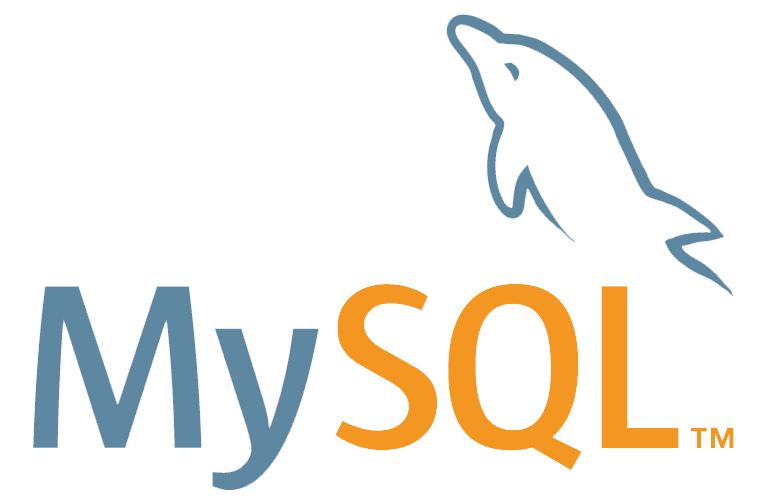

In [54]:
# import required libraries
import mysql.connector as sql

In [56]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='1234')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("CREATE DATABASE Real_estate_today")
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)

Database is created


In [61]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', database='Real_estate_today', user='root', password='1234')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS Real_estate_one;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE Real_estate_one (Home_type varchar(1000),about_home varchar(1000),Real_estate_company_details varchar(1000),sales_price varchar(1000))")
        print("Table is created....")
        #loop through the data frame
        for i,row in df2.iterrows():
            #here %S means string values 
            sql = "INSERT INTO Real_estate_one VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('real_estate_today',)
Creating table....
Table is created....
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Error while connecting to MySQL 1406 (22001): Data too long for column 'about_home' at row 1


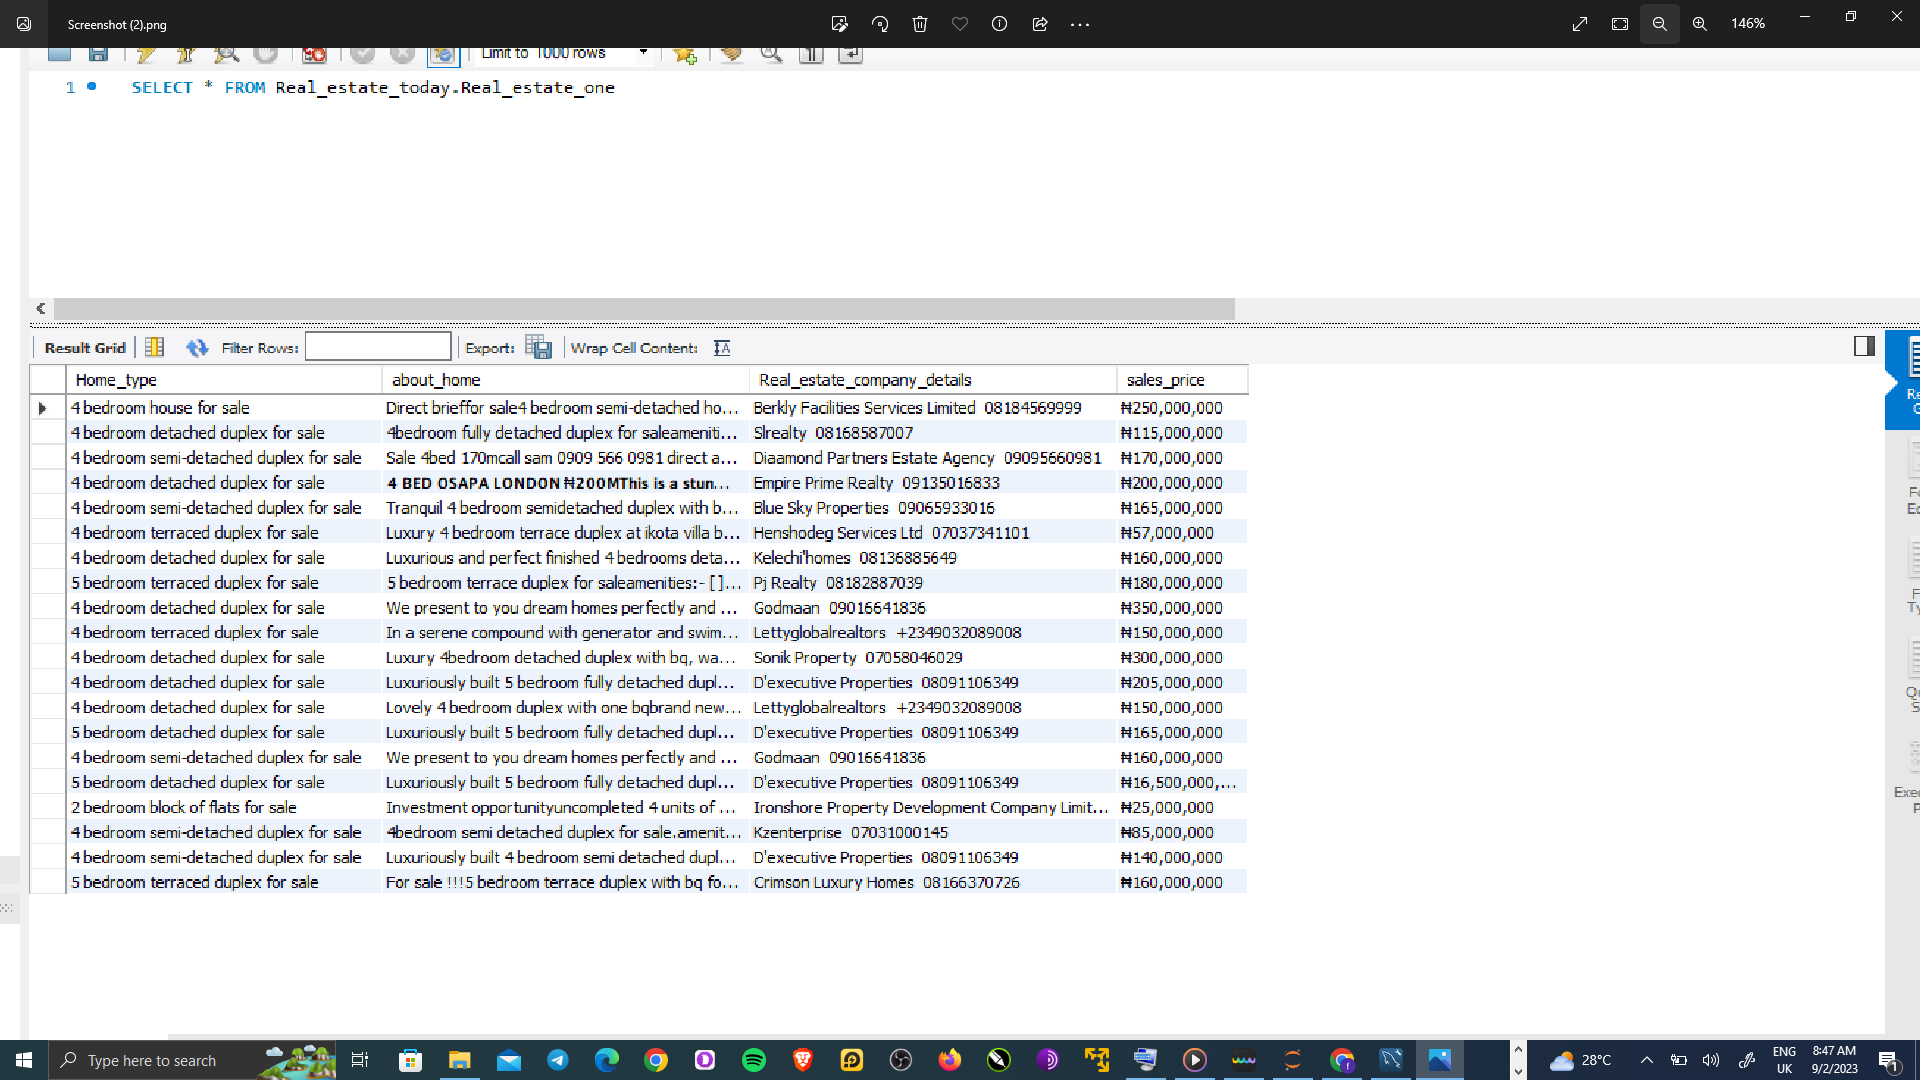

In [64]:
# Execute query
sql = "SELECT * FROM Real_estate_today.Real_estate_one"
cursor.execute(sql)
# Fetch all the records
result = cursor.fetchall()
for i in result:
    print(i)

('4 bedroom house for sale', 'Direct brieffor sale4 bedroom semi-detached house with 2 service rooms (bq).amenitiesfully fitted kitchen (with cooker, microwave, oven ) with store, house on 3 floors (with fabulous area view), family lounge, private cars park, grant quartermaine doors, cctv, gym house, swimming pool, green area, more 2 rooms, 24hr facilities personal and 24hr security personnel on site...so much morelocation:- palace road oniru lagossale pricengn 250m-----------------------------for more inquiries or schedule inspectionscontact mr. ola:- 08184569999whatsapp:- 08184569...', 'Berkly Facilities Services Limited \xa008184569999 ', '₦250,000,000 ')
('4 bedroom detached duplex for sale', '4bedroom fully detached duplex for saleamenities:- [ ] fitted kitchen- [ ] pop ceiling- [ ] detailed finishing- [ ] wardrobes- [ ] jacuzzi- [ ] cctv- [ ] gas cooker- [ ] water heater- [ ] heat extractorlocation: chevron lekkiprice: 115mfor more enquiries contact aramide on 08168587...', 'Slre

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:180%;
           font-family:Oswald;
           letter-spacing:0.7px">

<p style= "padding: 5px;
                  color:white;">
    
    
<p style = "text-align:center;"> END of Web Scraping ETL 📊

</p>
</div>